# MATH387: Honours Analysis
## Lab 3

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as scp

# Question1: Chebyshev interpolation

We will compute $||L_n||$ using the lagrange basis for chebishev nodes. We thus need to compute every Lagrange polynomial of degre 1 to n and then find the maximum if $x = \pm 1$. Then we will plot the function $||L_n||$ in function of n.

Therefore we can write the following functions


In [8]:
def chebyshev_nodes(n): #Compute the Chebyshev nodes
    points = []
    for i in range(1, n+1):
        points.append(np.cos((2*i-1)*np.pi/(2*n)))
    return points
    
def lagrange_polynomial(k, points): #Compute Lagrange polynomial for the point k of the points list
    def f(x):
        prod = 1
        for i in range(len(points)):
            if (i != k): 
                prod *= (x - points[i])/(points[k] - points[i])
        return prod
    return f

def abs_sum(polynomial, n): #Sum up the absolute value of the polynomial generated by the argument function for every k up to n
    points = chebyshev_nodes(n)
    n1 = 0
    n2 = 0
    for i in range(n):
        f = polynomial(i, points)
        n1 += np.absolute(f(1))
        n2 += np.absolute(f(-1))
    return max(n1, n2)

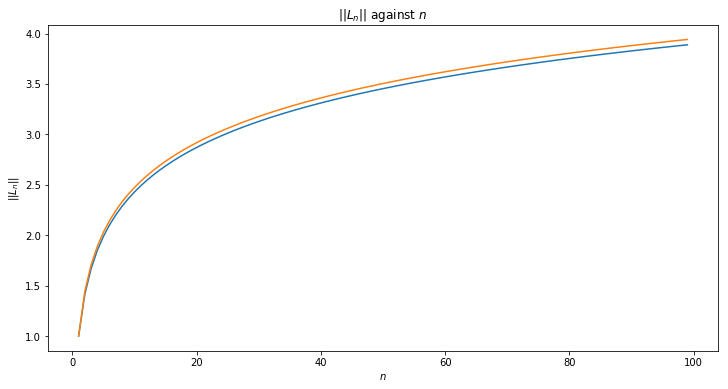

In [10]:
xlist = []
ylist = []

plt.figure(figsize=(12,6))

for i in range(1,100):
    xlist.append(i)
    ylist.append(abs_sum(lagrange_polynomial, i))
plt.plot(xlist,ylist)

ylist = 0.64*np.log(xlist) + 1 # Graph of log(x) to compare
plt.plot(xlist,ylist)

plt.title(r'$||L_n||$ against $n$')
plt.xlabel(r'$n$')
plt.ylabel('$||L_n||$')
plt.legend()
plt.show()

We can deduce from this graph that the Lagrange interpolation at Chebyshev's nodes has a lebesgue constant asymptotic to $O(0.64*log(n))$. Thus $C=0.64$

# Question 2

We will create a function that generate the nodes for the equidistant approximation. 
And a function that will evaluate the maximum of the $\lambda_n$ function

In [21]:
eps=1e-16

def equidistant_nodes(n):
    points = []
    for i in range(1, n+1):
        points.append((2*i-1)/(n) - 1)
    return points

def abs_sum_fct(polynomial, n): #Sum up the absolute value of the polynomial generated by the argument function for every k up to n
    points = equidistant_nodes(n)
    def f(x):
        res = 0
        for i in range(n):
            f = polynomial(i, points)
            res += np.absolute(f(x))
        return res
    return f

def root_finding(f, a, b):
    x = (b+a)/2
    i = 0
    f1x = 1
    while (f1x > eps and i < 100):
        
        f1x = scp.derivative(f, x, dx=1e-6)
        f2x = scp.derivative(f, x, dx=1e-6, n=2)
        x = x - (f1x/f2x)
        i += 1
    return x

def max_lambda(n):
    f = abs_sum_fct(lagrange_polynomial, n)
    x1 = root_finding(f, -1, -1 + (1/n))
    x2 = root_finding(f, 1 - 1/n, 1)
    
    return max(f(x1), f(x2))

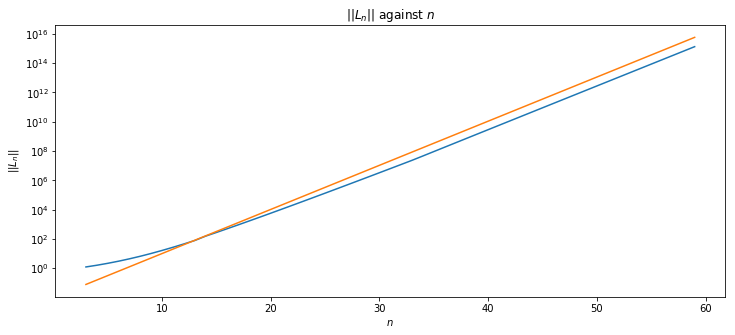

In [28]:
xlist = []
ylist = []

plt.figure(figsize=(12,5))

for i in range(3,60): #Very low interpolation causes errors
    xlist.append(i)
    ylist.append(max_lambda(i))
plt.plot(xlist,ylist)

ylist = 0.01*np.power(2, xlist)
plt.plot(xlist,ylist)

plt.yscale('log')
plt.title(r'$||L_n||$ against $n$')
plt.xlabel(r'$n$')
plt.ylabel('$||L_n||$')
plt.legend()
plt.show()

Experimentally we get an asymptotic constant in $O(0.1* 2^n)$, thus $C \approx 0.1$ 

# Question 3

We will implement a trapezoid solver to compute the integral involved in the computation of $||S_n||$. 
As we have: $$||S_n|| = \int_0^\pi \Big|\frac{\sin((n+\frac12)\theta)}{2\sin(\frac12\theta)}\Big| d\theta $$
We will make sure that every point where $\frac{\sin((n+\frac12)\theta)}{2\sin(\frac12\theta)}$ is null is an interval boundary. Luckily we know that sine is null for $k\pi$
Therefore $\frac{\sin((n+\frac12)\theta)}{2\sin(\frac12\theta)} = 0$ for $\theta = \frac{k}{2n +1} \pi$

In [348]:
def trapezoid(f,a,b):
    return ((b-a)/2)*(f(a) + f(b))

def integral(f, points):
    I = 0
    for i in range(len(points)-1):
        I += trapezoid(f, points[i], points[i+1])
    return I

def integrand_chebyshev(n):
    def f(x):
        if x % np.pi < 1e-16 : x = x+1e-16 # approximate the upper limit
        if np.pi - (x % np.pi) < 1e-16 : x = x-1e-16 # approximate the lower limit
        return np.absolute(np.sin((n+.5)*x)/(2*np.sin(x/2)))
    return f
        
def generate_points(n):
    if n < 50: n = 50 #In order to have a good enough approximation even if n is low
    points = []
    for i in range(2*n+2):
        points.append(i/(2*n+1)*np.pi)
    return points
        

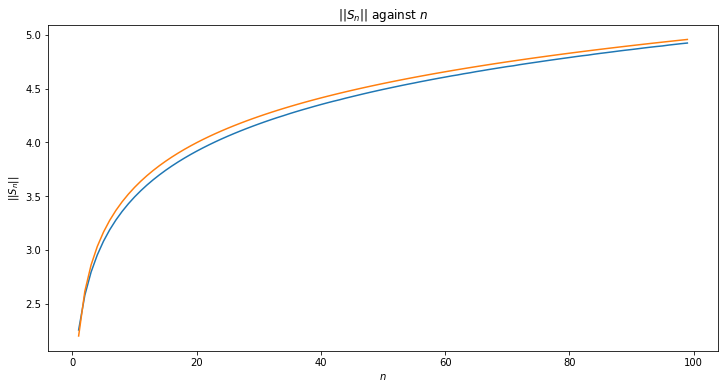

In [438]:
xlist = []
ylist = []

plt.figure(figsize=(12,6))

for i in range(1,100): 
    xlist.append(i)
    points = generate_points(1000) #use 1000 for a smooth curve
    f = integrand_chebyshev(i)
    ylist.append(integral(f, points))
plt.plot(xlist,ylist)

ylist = 0.60 * np.log(xlist) + 2.2 # Graph of log(x) to compare
plt.plot(xlist,ylist)

plt.title(r'$||S_n||$ against $n$')
plt.xlabel(r'$n$')
plt.ylabel('$||S_n||$')
plt.legend()
plt.show()

Experimentally it seems that the best approximation is of $O(0.6\log(n))$, thus $C \approx 0.6$

# Question 4

According question 1b of assignment 4, we have to compute the following integral: 
$$||S_n|| = \int_{-1}^1 \Big| \sum_{k=0}^n \frac{2k+1}{2} P_k(x) \Big| dx $$

In [23]:
def legendre_polynomial(k):
    def f(x):
        a = 0
        for i in range(k+1):
            a += (scp.comb(k, i))*(scp.comb(k+i, i))*(((x-1)/2)**i)
        return a
    return f

def integrand_legendre(n):
    def f(x):
        a = 0
        for i in range(n):
            P = legendre_polynomial(i)
            a += ((2*i+1)/2)*P(x)
        return np.absolute(a)
    return f

def integrate(f, a, b, n):
    points = np.linspace(a, b,100, endpoint=True)
    I = 0
    I += f(a)/2
    I += f(b)/2
    for i in range(1, n):
        I+= f(a + ((b-a)/n)*i)
    return I*((b-a)/n)
    

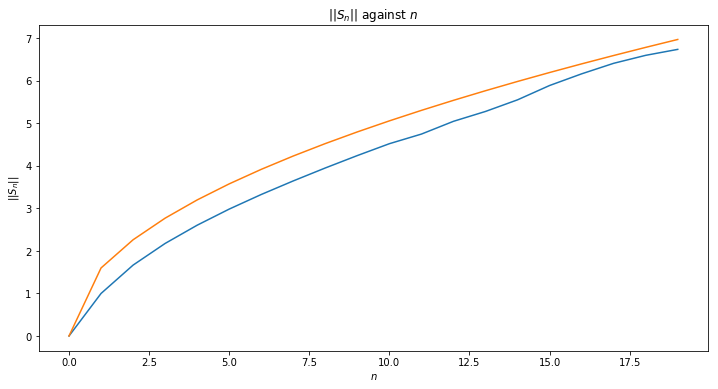

In [24]:
xlist = []
ylist = []

plt.figure(figsize=(12,6))

for i in range(0, 20): 
    xlist.append(i)
    f = integrand_legendre(i)
    ylist.append(integrate(f, -1, 1, 100))
plt.plot(xlist,ylist)

ylist = 1.6*np.sqrt(xlist)
plt.plot(xlist,ylist)

plt.title(r'$||S_n||$ against $n$')
plt.xlabel(r'$n$')
plt.ylabel('$||S_n||$')
plt.legend()
plt.show()

Experimentalement we can see that $||S_n||$ has a size asymptotic to $O(1.6 \sqrt{n})$. Thus $C \approx 1.6$

# Question 5

We want to compute the following value:
    $$||Q_n|| = \sum_{k=0}^n \Big| \int_0^1 \phi_{n,k}(x)dx \Big|$$

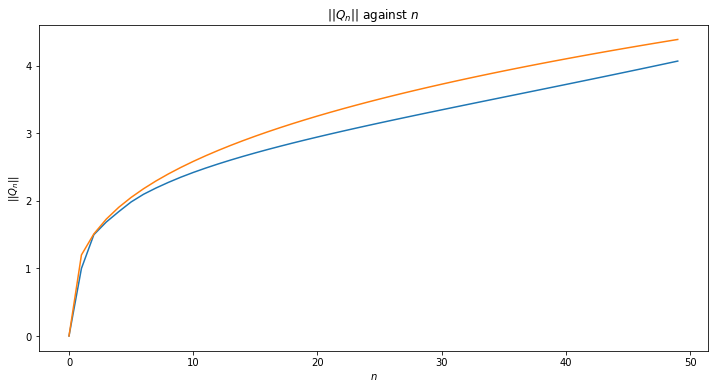

In [440]:
xlist = []
ylist = []

plt.figure(figsize=(12,6))

for i in range(0, 50): 
    xlist.append(i)
    points = equidistant_nodes(i+1)
    val = 0
    for k in range (i):
        f = lagrange_polynomial(i, points)
        val += np.absolute(integrate(f, 0, 1, 100))
    ylist.append(val)
plt.plot(xlist,ylist)

ylist = 1.2*np.cbrt(xlist)
plt.plot(xlist,ylist)

plt.title(r'$||Q_n||$ against $n$')
plt.xlabel(r'$n$')
plt.ylabel('$||Q_n||$')
plt.legend()
plt.show()

According to experimentation, $||Q_n||$ seems to be asymptotic to $O(\sqrt[3]{n})$